In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from catboost import CatBoostRegressor
from  sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor

from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
df=pd.read_csv('Train_Preprocessed.csv')

In [34]:
df.head()

,Deal_value,month,week,Success_probability,Internal_rating,Weighted_amount,year,Geography_India,Geography_USA,Resource_Cannot deliver,...,Lead_revenue,Designation,Hiring_candidate_role,Level_of_meeting,Lead_name,Industry,POC_name,Location,Internal_POC,Last_lead_update
0,320506.0,3,13,73.6,3,2.067263e+06,2020,0.0,1.0,0.0,...,1,7,126,2,1386,119,568,292,12,7
1,39488.0,7,28,58.9,5,2.408760e+05,2019,1.0,0.0,0.0,...,2,4,501,0,411,31,4528,457,5,2
2,359392.0,7,30,68.8,4,2.407926e+06,2019,0.0,1.0,0.0,...,2,8,286,0,940,56,272,15,18,4
3,76774.0,1,4,64.5,1,4.683210e+05,2021,0.0,1.0,0.0,...,2,2,611,1,1943,114,1170,372,5,2
4,483896.0,5,21,62.4,4,1.569883e+06,2019,1.0,0.0,0.0,...,1,7,369,1,3477,46,3962,505,53,9


In [35]:
y=df['Success_probability']
X=df.drop(['Success_probability','week'],axis=1)

In [36]:
X.head()

,Deal_value,month,Internal_rating,Weighted_amount,year,Geography_India,Geography_USA,Resource_Cannot deliver,Resource_Deliverable,Resource_No,...,Lead_revenue,Designation,Hiring_candidate_role,Level_of_meeting,Lead_name,Industry,POC_name,Location,Internal_POC,Last_lead_update
0,320506.0,3,3,2.067263e+06,2020,0.0,1.0,0.0,0.0,1.0,...,1,7,126,2,1386,119,568,292,12,7
1,39488.0,7,5,2.408760e+05,2019,1.0,0.0,0.0,0.0,1.0,...,2,4,501,0,411,31,4528,457,5,2
2,359392.0,7,4,2.407926e+06,2019,0.0,1.0,0.0,0.0,1.0,...,2,8,286,0,940,56,272,15,18,4
3,76774.0,1,1,4.683210e+05,2021,0.0,1.0,0.0,0.0,0.0,...,2,2,611,1,1943,114,1170,372,5,2
4,483896.0,5,4,1.569883e+06,2019,1.0,0.0,0.0,0.0,1.0,...,1,7,369,1,3477,46,3962,505,53,9


### Feature Selection

In [15]:
model_et_fs=ExtraTreesRegressor()
model_et_fs.fit(X,y)

ExtraTreesRegressor()

In [16]:
model_et_fs.feature_importances_

array([0.04483345, 0.04478435, 0.04455447, 0.04525948, 0.03429722,
       0.02225259, 0.00147895, 0.02025942, 0.0205238 , 0.02125664,
       0.01784716, 0.01699537, 0.02141146, 0.0131623 , 0.0163935 ,
       0.01624665, 0.01407011, 0.01743795, 0.02026103, 0.01836764,
       0.01797268, 0.0160105 , 0.01617646, 0.03664925, 0.04729405,
       0.04871464, 0.02451189, 0.05127988, 0.05067042, 0.06736448,
       0.05130432, 0.05122536, 0.0491325 ])

In [17]:
len(X.columns)

33

<AxesSubplot:>

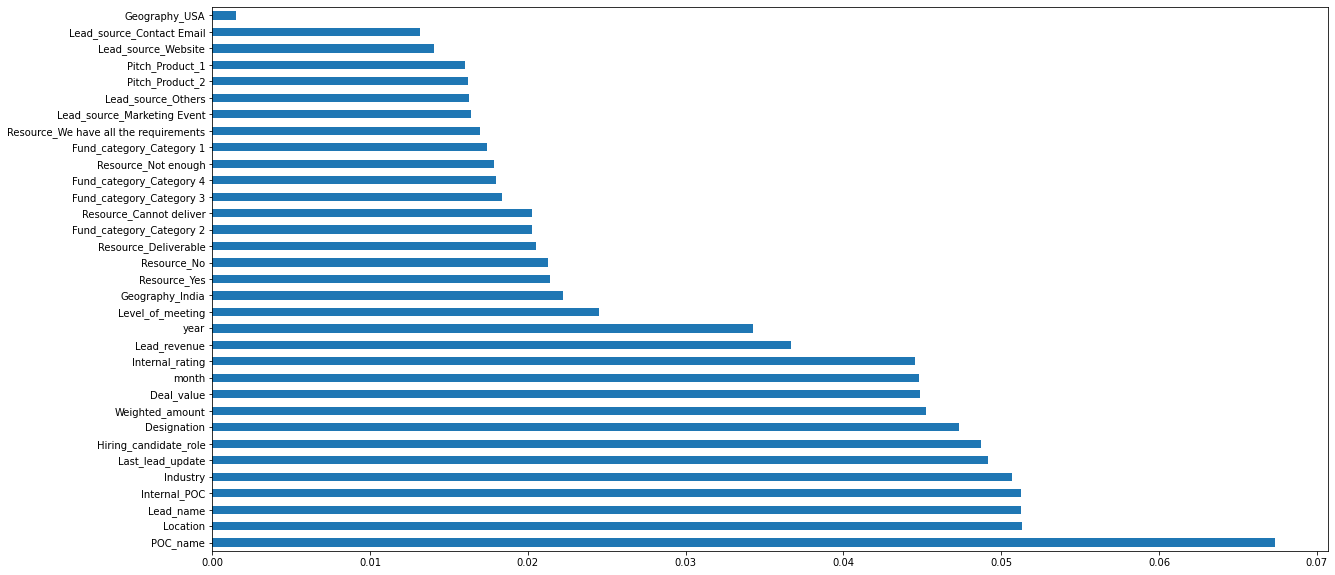

In [18]:
plt.figure(figsize=(20,10))
pd.Series(model_et_fs.feature_importances_, index = X.columns).nlargest(len(model_et_fs.feature_importances_)).plot(kind = 'barh')

In [19]:
a=pd.Series(model_et_fs.feature_importances_, index = X.columns).nlargest(10)

In [20]:
a.index


Index(['POC_name', 'Location', 'Lead_name', 'Internal_POC', 'Industry',
       'Last_lead_update', 'Hiring_candidate_role', 'Designation',
       'Weighted_amount', 'Deal_value'],
      dtype='object')

In [21]:
X_selected=X[a.index]

In [22]:
X_selected.head()

,POC_name,Location,Lead_name,Internal_POC,Industry,Last_lead_update,Hiring_candidate_role,Designation,Weighted_amount,Deal_value
0,568,292,1386,12,119,7,126,7,2.067263e+06,320506.0
1,4528,457,411,5,31,2,501,4,2.408760e+05,39488.0
2,272,15,940,18,56,4,286,8,2.407926e+06,359392.0
3,1170,372,1943,5,114,2,611,2,4.683210e+05,76774.0
4,3962,505,3477,53,46,9,369,7,1.569883e+06,483896.0


### No improvement after doing feature selection

## PCA

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [15]:
# Standard Scaling the dataset
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
scaled_data_train = scaler.transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [17]:
pca = PCA(n_components=10)

In [18]:
pca.fit(scaled_data_train)

PCA(n_components=10)

In [19]:
X_train_pca = pca.transform(scaled_data_train)
X_test_pca = pca.transform(scaled_data_test)

In [20]:
scaled_data_train.shape

(4694, 33)

In [21]:
X_train_pca.shape

(4694, 10)

Text(0, 0.5, 'Second Principal Component')

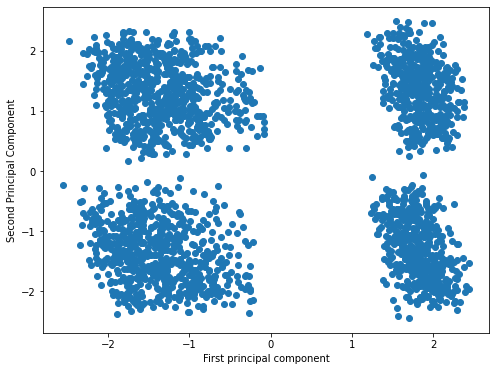

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### Model Building

### Random Forest

In [38]:
model_rf=RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
pred_rf=model_rf.predict(X_test)

In [40]:
pred_rf=pd.Series(pred_rf).apply(lambda x:0 if x<0 else x)
pred_rf=pd.Series(pred_rf).apply(lambda x:100 if x>100 else x)

In [41]:
mean_squared_error(y_test,pred_rf)

279.5002165948984

In [42]:
## HackerEarth Metics
Score=max(0,100-np.sqrt(mean_squared_error(y_test,pred_rf)))
Score

83.28174002490395

### GradientBoostingRegressor

In [43]:
model_gb=GradientBoostingRegressor(n_estimators= 60)
model_gb.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=60)

In [44]:
pred_gb=model_gb.predict(X_test)

In [45]:
pred_gb=pd.Series(pred_gb).apply(lambda x:0 if x<0 else x)
pred_gb=pd.Series(pred_gb).apply(lambda x:100 if x>100 else x)

In [46]:
mean_squared_error(y_test,pred_gb)

272.1119714049601

In [47]:
## HackerEarth Metics
Score=max(0,100-np.sqrt(mean_squared_error(y_test,pred_gb)))
Score

83.50418321497962

Text(0.5, 0, 'Success_probability')

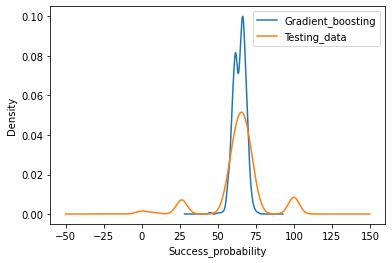

In [48]:
pred_gb.plot.kde()
y_test.plot.kde()
plt.legend(['Gradient_boosting','Testing_data'])
plt.xlabel('Success_probability')

### Catboost Regressor

In [49]:
model_cat=CatBoostRegressor(verbose=False)
model_cat.fit(X_train,y_train)

In [50]:
pred_cat=model_cat.predict(X_test)

In [51]:
pred_cat=pd.Series(pred_cat).apply(lambda x:0 if x<0 else x)
pred_cat=pd.Series(pred_cat).apply(lambda x:100 if x>100 else x)

In [52]:
mean_squared_error(y_test,pred_cat)

279.487415986286

In [53]:
## HackerEarth Metics
Score=max(0,100-np.sqrt(mean_squared_error(y_test,pred_cat)))
Score

83.28212286244793

### Extra tree Regressor

In [68]:
model_et=ExtraTreesRegressor(n_estimators=500)
model_et.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=500)

In [69]:
pred_et=model_et.predict(X_test)

In [70]:
pred_et=pd.Series(pred_et).apply(lambda x:0 if x<0 else x)
pred_et=pd.Series(pred_et).apply(lambda x:100 if x>100 else x)

In [71]:
mean_squared_error(y_test,pred_et)

279.26791541799844

In [72]:
## HackerEarth Metics
Score=max(0,100-np.sqrt(mean_squared_error(y_test,pred_et)))
Score

83.28868899762803

### Linear Regression

In [59]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [60]:
pred_lr=model_lr.predict(X_test)

In [61]:
pred_lr=pd.Series(pred_lr).apply(lambda x:0 if x<0 else x)
pred_lr=pd.Series(pred_lr).apply(lambda x:100 if x>100 else x)

In [62]:
mean_squared_error(y_test,pred_et)

281.4747473320322

In [63]:
## HackerEarth Metics
Score=max(0,100-np.sqrt(mean_squared_error(y_test,pred_et)))
Score

83.22279083601708

### Model Default Compare (Best of Worst)

In [96]:
MLA=[LinearRegression(),\
     RandomForestRegressor(),\
     ExtraTreesRegressor(),\
     SVR(),\
     GradientBoostingRegressor(),\
     BaggingRegressor(),\
     CatBoostRegressor(verbose=False)\
]

In [97]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = ShuffleSplit(n_splits = 10, test_size = .20, train_size = .80, \
                                                random_state = 0 )
                    # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Mean Squared Error','MLA Test Mean Mean Squared Error','MLA Test Mean HackerEarth Score', \
                'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y.copy()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    print("Running the Regression on %s" %(MLA_name))
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = cross_validate(alg, X, y, cv = cv_split,return_train_score=\
                                             True, scoring='neg_mean_squared_error')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Mean Squared Error'] = abs(cv_results['train_score']).mean()
    MLA_compare.loc[row_index, 'MLA Test Mean Mean Squared Error'] = abs(cv_results['test_score']).mean()
    MLA_compare.loc[row_index, 'MLA Test Mean HackerEarth Score'] = max(0,100-np.sqrt(abs(cv_results['test_score']).mean()))
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets
    #MLA_compare.loc[row_index, 'MLA Test Error 3*STD'] = cv_results['test_score'].std()*3   
    #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X, y)
    MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Mean HackerEarth Score'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

Running the Regression on LinearRegression
Running the Regression on RandomForestRegressor
Running the Regression on ExtraTreesRegressor
Running the Regression on SVR
Running the Regression on GradientBoostingRegressor
Running the Regression on BaggingRegressor
Running the Regression on CatBoostRegressor


,MLA Name,MLA Parameters,MLA Train Mean Squared Error,MLA Test Mean Mean Squared Error,MLA Test Mean HackerEarth Score,MLA Time
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",258.441,252.1,84.1223,0.0109968
4,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",225.103,254.007,84.0624,1.3051
1,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",38.1052,262.413,83.8008,5.0434
6,CatBoostRegressor,"{'loss_function': 'RMSE', 'verbose': False}",101.412,264.46,83.7378,2.2988
3,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",274.28,265.816,83.6961,1.45009
2,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",8.58775e-27,270.531,83.5522,2.64779
5,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",54.001,290.885,82.9447,0.531599


In [108]:
# Function to get optimal model using grid search CV (n_splits = 5, validation set = 0.175 of train set)
def RnCV(param,reg,XY_data):
    [X_train, X_test, Y_train, Y_test] = XY_data
    reg.fit(X_train,Y_train)
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)
    print("Default Training mean_squared_error = {}".format(mean_squared_error(Y_train,Y_train_pred)))
    print("Default Test mean_squared_error = {}".format(mean_squared_error(Y_test,Y_test_pred)))
    #cv_split = StratifiedKFold(n_splits = 3)
    best_model = RandomizedSearchCV(estimator = reg, param_distributions = param, cv = 5,\
                              scoring = 'neg_mean_squared_error',n_jobs=-1)
    best_model.fit(X_train, Y_train)
    best_param = best_model.best_params_
    print("Best parameters are : {}".format(best_param))
    reg.set_params(**best_param)
    reg.fit(X_train, Y_train)
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)
    print("Training mean_squared_error = {}".format(mean_squared_error(Y_train,Y_train_pred)))
    print("Test mean_squared_error = {}".format(mean_squared_error(Y_test,Y_test_pred)))
    return reg

In [111]:
XY_data = [X_train, X_test, y_train, y_test]

In [112]:
model_gb_base=GradientBoostingRegressor()


In [113]:
param={'learning_rate':[0.1,0.05,0.15,0.2,0.4,0.6,1],\
       'loss':['ls', 'lad', 'huber', 'quantile'],\
       'n_estimators':[100,200,500,700,1000],\
       'criterion':['mse'],\
       'min_samples_split':[1,3,5,7],\
       'min_samples_leaf':[1,2,3,4,5],\
       'max_depth':[10,20,30,35,40],\
       'max_features':['auto', 'sqrt', 'log2']\
}

In [114]:
model_gb_tuned=RnCV(param,model_gb_base,XY_data)

Default Training mean_squared_error = 214.2179680970623
Default Test mean_squared_error = 272.633102720985


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-316.58850339 -277.13198478 -377.05422319           nan           nan
           nan -304.86825443 -270.75622443           nan -281.19070509]
  warnings.warn(


Best parameters are : {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'loss': 'lad', 'learning_rate': 0.1, 'criterion': 'mse'}
Training mean_squared_error = 25.284746748369205
Test mean_squared_error = 284.22580378183227


# Making Final Model

In [73]:
model=ExtraTreesRegressor(n_estimators=500)
model.fit(X,y)

ExtraTreesRegressor(n_estimators=500)

In [74]:
pickle.dump(model, open('model.pkl', 'wb'))